In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
from skimage.io import imshow, imread
from skimage.transform import resize
import glob
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

In [20]:
def preprocessing_image(img):
    print(img.shape)
    img = resize(img, (150,150,3))
    img /= 255
    img = img.reshape((1,)+img.shape)
    return img

In [3]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.add(Activation('relu'))
# model.add(Dense(1))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.load_weights('models/color_softmax_car_cropneg60001000_30_epochs.h5')

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 148, 148, 32)  896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 148, 148, 32)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 74, 74, 32)    0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 72, 72, 64)    18496       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [19]:
img_list = ['./dataset/ColorCars/BackgroundCrops150150/1238_5.jpg',
            './dataset/ColorCars/BackgroundCrops150150/1237_4.jpg',
            './dataset/ColorCars/BackgroundCrops150150/1236_4.jpg',
            './dataset/ColorCars/BackgroundCrops150150/1230_3.jpg']

for ip in img_list:
    img = imread(ip)
    img = preprocessing_image(img)
    print(model.predict_classes(img))
    print(model.predict_proba(img))

(150, 150, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[ 0.99899632  0.00100374]]
(150, 150, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[ 0.99899381  0.00100623]]
(150, 150, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[  9.99052107e-01   9.47882247e-04]]
(150, 150, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[  9.99207675e-01   7.92295265e-04]]


In [11]:
ip = './dataset/non_car_test1.jpg'
img = imread(ip)
img = preprocessing_image(img)
print(model.predict_classes(img))
print(model.predict_proba(img))

1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[  9.99022007e-01   9.77955875e-04]]


(400, 600, 3)
(400, 600, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[  9.99036670e-01   9.63319675e-04]]
(675, 900, 3)
(675, 900, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[ 0.99890685  0.00109317]]
(480, 640, 3)
(480, 640, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[ 0.99896502  0.00103495]]
(1386, 2100, 3)
(1386, 2100, 3)
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[[  9.99046743e-01   9.53197421e-04]]


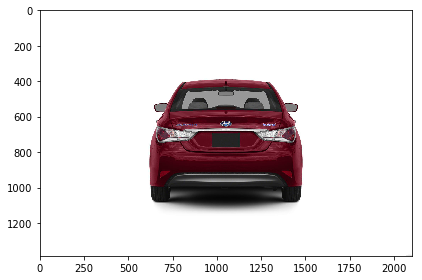

In [24]:
# img_list = ['./dataset/ColorCars/TrainOrigins/08144.jpg',
#             './dataset/ColorCars/TrainOrigins/08143.jpg',
#             './dataset/ColorCars/TrainOrigins/08142.jpg',
#             './dataset/ColorCars/TrainOrigins/08141.jpg']

img_list = ['./dataset/ColorCars/TrainOrigins/00001.jpg',
            './dataset/ColorCars/TrainOrigins/00002.jpg',
            './dataset/ColorCars/TrainOrigins/00003.jpg',
            './dataset/ColorCars/TrainOrigins/00004.jpg']

for ip in img_list:
    img = imread(ip)
    imshow(img)
    print(img.shape)
    img = preprocessing_image(img)
    print(model.predict_classes(img))
    print(model.predict_proba(img))